## Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model # regressor
import scipy.stats as stats # calc p_val
import math

### Estimating Coefficients

In [2]:
Advertising = pd.read_csv("Advertising.csv", index_col =0)

In [3]:
Advertising.head(2)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [4]:
Advertising.shape

(200, 4)

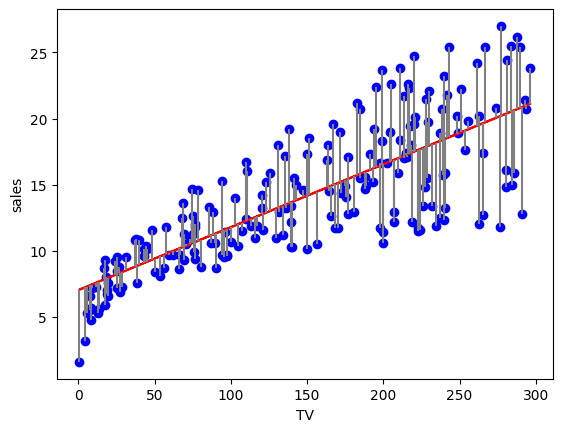

In [5]:
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['TV']], Advertising.loc[:,'sales']) 
plt.scatter(y = 'sales', x = 'TV', data = Advertising, c = 'b')
plt.plot(Advertising.loc[:,['TV']], regressor.predict(Advertising.loc[:,['TV']]), '-r')
plt.vlines(Advertising.TV, regressor.predict(Advertising.loc[:,['TV']]), Advertising.sales, 'grey') # just wanted to plot those error lines
plt.ylabel("sales"); plt.xlabel("TV");

### Assessing the Accuracy of the Coefficient Estimates

In [6]:
advert_2 = Advertising.copy()
advert_2 = advert_2.iloc[:, [0,3]]
advert_2['x_bar'] = advert_2.TV.mean()
advert_2['y_bar'] = advert_2.sales.mean()
advert_2['x-x_bar'] = advert_2.TV - advert_2['x_bar']
advert_2['y-y_bar'] = advert_2.sales - advert_2['y_bar']
advert_2['x-x_bar_squared'] = advert_2['x-x_bar']**2 
advert_2['x-x_bar*y-y_bar'] = advert_2['x-x_bar']*advert_2['y-y_bar'] 

In [7]:
advert_2.head(1)

,TV,sales,x_bar,y_bar,x-x_bar,y-y_bar,x-x_bar_squared,x-x_bar*y-y_bar
1,230.1,22.1,147.0425,14.0225,83.0575,8.0775,6898.548306,670.896956


In [8]:
beta_1 = sum(advert_2['x-x_bar*y-y_bar'])/sum(advert_2['x-x_bar_squared'])
beta_0 = advert_2.sales.mean()-beta_1 * advert_2.TV.mean()
print("Beta 0: {}".format(beta_0))
print("Beta 1: {}".format(beta_1))

Beta 0: 7.0325935491276965
Beta 1: 0.047536640433019736


In [9]:
RSS = sum((advert_2.sales - beta_0 - beta_1 * advert_2.TV)**2)
RSS

2102.5305831313512

In [10]:
regressor = linear_model.LinearRegression().fit(Advertising.loc[:,['TV']], Advertising.loc[:,'sales']) 
print("Intercept: {} and Coeff: {}".format(regressor.intercept_,regressor.coef_))

Intercept: 7.032593549127695 and Coeff: [0.04753664]


In [11]:
# standard errors associated with beta_0 and beta_1
n = advert_2.TV.shape[0]
# residual standard error
RSE = math.sqrt(RSS/(n-2))
# RSE = np.std((advert_2.sales - beta_0 - beta_1 * advert_2.TV))
#
SE_beta_0 = math.sqrt(
    RSE * RSE * ((1/n) + (advert_2.TV.mean()**2)/(sum(advert_2['x-x_bar_squared']))))
SE_beta_1 = math.sqrt(
    RSE * RSE /(sum(advert_2['x-x_bar_squared'])))
print("SE_beta_0_squared: {} and SE_beta_1_squared: {}".format(SE_beta_0**2, SE_beta_1**2))

SE_beta_0_squared: 0.209620157958264 and SE_beta_1_squared: 7.239367039024185e-06


In [12]:
# beta_0_95_perc_CI
print([beta_0 - 2*SE_beta_0, beta_0 + 2*SE_beta_0])

# beta_1_95_perc_CI
print([beta_1 - 2*SE_beta_1, beta_1 + 2*SE_beta_1])

[np.float64(6.1169076685807395), np.float64(7.9482794296746535)]
[0.042155426057426, 0.052917854808613475]


In [13]:
t_statistics_b1 = (beta_1 - 0)/SE_beta_1
t_statistics_b0 = (beta_0 - 0)/SE_beta_0
# https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic?noredirect=1&lq=1
df = advert_2.shape[0]
p_values_b0 = 2*(1-stats.t.cdf(np.abs(t_statistics_b0),(df-1)))
p_values_b1 = 2*(1-stats.t.cdf(np.abs(t_statistics_b1),(df-1)))
#

In [14]:
pd.DataFrame(
    {'Variable': ["Intercept", "TV"],
    'Coefficient': [beta_0, beta_1],
    'Std.error': [SE_beta_0, SE_beta_1],
    't-statistic': [t_statistics_b0, t_statistics_b1],
     'P-values' : [p_values_b0, p_values_b1]
    }
)

,Variable,Coefficient,Std.error,t-statistic,P-values
0,Intercept,7.032594,0.457843,15.360275,0.0
1,TV,0.047537,0.002691,17.667626,0.0


In [15]:
# Let Me try create class for model summary

In [16]:
class Summaries_SimpleLR:
    def __init__(self, data, x_variable, y_variable, level_of_confidence = 0.05):
        self.data = data
        self.x_variable = x_variable 
        self.y_variable = y_variable
        self.level_of_confidence = level_of_confidence

    def summary(self):
        print("Simple Linear Regression of Y:{} on X: {}".format(self.y_variable,self.x_variable))
        # Hypothesis
        print("H_0: There is no relationship between X: {} and Y:{}".format(self.x_variable,self.y_variable))
        print("H_a: There is some relationship between X: {} and Y:{}".format(self.x_variable,self.y_variable))
        # get x and y bars
        x_bar = self.data[self.x_variable].mean()
        y_bar = self.data[self.y_variable].mean()
        self.data['x-x_bar'] = self.data[self.x_variable] - x_bar
        self.data['y-y_bar'] = self.data[self.y_variable] - y_bar
        self.data['x-x_bar_squared'] = self.data['x-x_bar']**2 
        self.data['x-x_bar*y-y_bar'] = self.data['x-x_bar']*self.data['y-y_bar'] 
        # get betas
        beta_1 = sum(self.data['x-x_bar*y-y_bar'])/sum(self.data['x-x_bar_squared'])
        beta_0 = y_bar-beta_1 * x_bar
        # RSS: 
        RSS = sum((self.data[self.y_variable] - beta_0 - beta_1 * self.data[self.x_variable])**2)
        # standard errors associated with beta_0 and beta_1
        n = self.data.shape[0]
        # residual standard error
        RSE = math.sqrt(RSS/(n-2)) # measure of lack of fit of model to the data
        # RSE = np.std(RSS)
        SE_beta_0 = math.sqrt(
            RSE * RSE * ((1/n) + (x_bar**2)/(sum(self.data['x-x_bar_squared']))))
        SE_beta_1 = math.sqrt(
            RSE * RSE /(sum(self.data['x-x_bar_squared'])))
        # t-statistic
        t_statistics_b1 = (beta_1 - 0)/SE_beta_1
        t_statistics_b0 = (beta_0 - 0)/SE_beta_0
        # p-values
        # https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic?noredirect=1&lq=1
        p_values_b0 = 2*(1-stats.t.cdf(np.abs(t_statistics_b0),(df-1)))
        p_values_b1 = 2*(1-stats.t.cdf(np.abs(t_statistics_b1),(df-1)))
        # beta 0
        beta_0_decision_1 = "Fail to reject null"
        beta_0_decision_2 = "Reject null: In absence of X: {}, Y:{} is non-zero".format(self.x_variable,self.y_variable)
        # beta 1
        beta_1_decision_1 = "Fail to reject null"
        beta_1_decision_2 = "Reject null: a relationship to exist between X: {} and Y:{}".format(self.x_variable,self.y_variable)
        #
        TSS = sum(self.data['y-y_bar'] ** 2)
        r_squared = 1 - (RSS/TSS)
        #
        n = self.data.shape[0] # number of observations
        k = 1 # number of predictors 
        F_statistic = (r_squared / (1 - r_squared))*((n - k - 1)/k)
        #
        print(
            pd.DataFrame(
                {'Residual Standard Error': [RSS],
                'R Squared': [r_squared],
                'F-Statistic': [F_statistic]}
            )
        )
        #
        # return df of model summary
        return pd.DataFrame(
            {'Variable': ["Intercept", "TV"],
            'Coefficient': [beta_0, beta_1],
            'Std.error': [SE_beta_0, SE_beta_1],
             'Lower CI': [beta_0 - 2*SE_beta_0, beta_1 - 2*SE_beta_1],
             'Upper CI': [beta_0 + 2*SE_beta_0, beta_1 + 2*SE_beta_1],
            't-statistic': [t_statistics_b0, t_statistics_b1],
             'P-values' : [p_values_b0, p_values_b1],
             'Decision': [
                 beta_0_decision_1 if (p_values_b0 > self.level_of_confidence) else beta_0_decision_2,
                 beta_1_decision_1 if (p_values_b1 > self.level_of_confidence) else beta_1_decision_2
             ]
            }
        )

In [17]:
mm = Summaries_SimpleLR(data=Advertising.copy(), x_variable='TV', y_variable='sales',level_of_confidence = 0.05)
mm.summary()

Simple Linear Regression of Y:sales on X: TV
H_0: There is no relationship between X: TV and Y:sales
H_a: There is some relationship between X: TV and Y:sales
   Residual Standard Error  R Squared  F-Statistic
0              2102.530583   0.611875   312.144994


,Variable,Coefficient,Std.error,Lower CI,Upper CI,t-statistic,P-values,Decision
0,Intercept,7.032594,0.457843,6.116908,7.948279,15.360275,0.0,"Reject null: In absence of X: TV, Y:sales is n..."
1,TV,0.047537,0.002691,0.042155,0.052918,17.667626,0.0,Reject null: a relationship to exist between X...


### Assessing the Accuracy of the Model

In [18]:
RSE
RSS
math.sqrt((1/(advert_2.shape[0]-2))*RSS)

3.2586563686504624

In [19]:
TSS = sum(advert_2['y-y_bar'] ** 2)
r_squared = 1 - (RSS/TSS)
r_squared

0.611875050850071

In [20]:
n = advert_2.shape[0]
k = 1 #advert_2.shape[1] - 1
F_statistic = (r_squared / (1 - r_squared))*((n - k - 1)/k)
F_statistic # 

312.14499437271286

## Multiple Linear Regression

In [21]:
mm = Summaries_SimpleLR(data=Advertising.copy(), x_variable='TV', y_variable='sales',level_of_confidence = 0.05)
mm.summary()

Simple Linear Regression of Y:sales on X: TV
H_0: There is no relationship between X: TV and Y:sales
H_a: There is some relationship between X: TV and Y:sales
   Residual Standard Error  R Squared  F-Statistic
0              2102.530583   0.611875   312.144994


,Variable,Coefficient,Std.error,Lower CI,Upper CI,t-statistic,P-values,Decision
0,Intercept,7.032594,0.457843,6.116908,7.948279,15.360275,0.0,"Reject null: In absence of X: TV, Y:sales is n..."
1,TV,0.047537,0.002691,0.042155,0.052918,17.667626,0.0,Reject null: a relationship to exist between X...


In [22]:
mm = Summaries_SimpleLR(data=Advertising.copy(), x_variable='radio', y_variable='sales',level_of_confidence = 0.05)
mm.summary()

Simple Linear Regression of Y:sales on X: radio
H_0: There is no relationship between X: radio and Y:sales
H_a: There is some relationship between X: radio and Y:sales
   Residual Standard Error  R Squared  F-Statistic
0              3618.479549   0.332032    98.421588


,Variable,Coefficient,Std.error,Lower CI,Upper CI,t-statistic,P-values,Decision
0,Intercept,9.311638,0.562900,8.185837,10.437439,16.542245,0.0,"Reject null: In absence of X: radio, Y:sales i..."
1,TV,0.202496,0.020411,0.161673,0.243318,9.920765,0.0,Reject null: a relationship to exist between X...


In [23]:
mm = Summaries_SimpleLR(data=Advertising.copy(), x_variable='newspaper', y_variable='sales',level_of_confidence = 0.05)
mm.summary()

Simple Linear Regression of Y:sales on X: newspaper
H_0: There is no relationship between X: newspaper and Y:sales
H_a: There is some relationship between X: newspaper and Y:sales
   Residual Standard Error  R Squared  F-Statistic
0              5134.804544    0.05212    10.887299


,Variable,Coefficient,Std.error,Lower CI,Upper CI,t-statistic,P-values,Decision
0,Intercept,12.351407,0.621420,11.108567,13.594247,19.876096,0.000000,"Reject null: In absence of X: newspaper, Y:sal..."
1,TV,0.054693,0.016576,0.021542,0.087845,3.299591,0.001147,Reject null: a relationship to exist between X...


### Estimating the Regression Coefficient

In [24]:
Advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [25]:
Advertising.corr().style.background_gradient()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [26]:
multiple_regressor = linear_model.LinearRegression()
multiple_regressor.fit(Advertising.loc[:,['TV', 'radio', 'newspaper']], Advertising.loc[:,'sales'])                                                          

LinearRegression()

In [27]:
multiple_regressor.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [28]:
multiple_regressor.intercept_

np.float64(2.938889369459412)

In [29]:
(multiple_regressor.feature_names_in_,multiple_regressor.coef_)

(array(['TV', 'radio', 'newspaper'], dtype=object),
 array([ 0.04576465,  0.18853002, -0.00103749]))

## Other Considerations in Regresssion Model

In [33]:
Credit = pd.read_csv("Credit.csv")

In [34]:
Credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


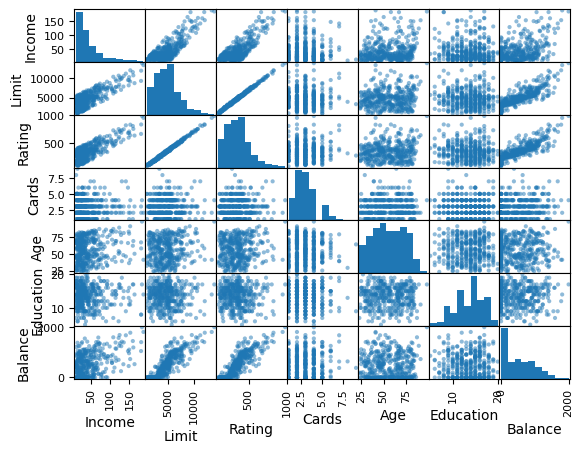

In [42]:
pd.plotting.scatter_matrix(Credit);

In [47]:
regressor = linear_model.LinearRegression().fit(pd.get_dummies( Credit.loc[:,['Own']]), Credit.loc[:,'Balance']) 

In [48]:
regressor.intercept_

np.float64(3.040686259265634e+16)

In [49]:
regressor.coef_

array([-3.04068626e+16, -3.04068626e+16])

In [50]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

ModuleNotFoundError: No module named 'statsmodels'